In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os,sys
import numpy as np
import pandas as pd
import astropy.stats as stat

import matplotlib
from   matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
import time

rc('text', usetex=True)
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

sys.path.insert(1, '/home/amarins/ComponentSeparation/gmca/scripts')
import Extension4BINGO as cs
import statcosmo as statc

In [2]:
#####################################
#paths
#####################################
pathcls1      = "/home/amarins/ComponentSeparation/gmca/outputs/ICAn4nr100" 
pathcls2      = "/home/amarins/ComponentSeparation/gmca/outputs/ICAn3nr50" 
pathcls3      = "/home/amarins/ComponentSeparation/gmca/outputs/ICAn3nr100" 
dir_hi        = "21cm"        #Directory name of the cls of the 21cm reconstruction maps
dir_fg        = "foregrounds" #Directory name of the cls of the foregrounds reconstruction maps
dir_prior     = "prior"       #Directory name of the cls of the prior maps, that can be (21cm + noise) masked
dir_noise     = "noise"       #Directory name of the cls of the noise maps, that can be (WhiteNoise or/and 1/f) masked
dir_pure      = "pure"        #Directory name of the cls of the (only) 21cm maps, masked or not.
dir_projnoise = "projnoise"   #Directory name of the cls of the noise maps, that can be (WhiteNoise or/and 1/f) masked
dir_projpure  = "projpure"    #Directory name of the cls of the (only) 21cm maps, masked or not.
dir_projprior = "projprior"   #

#Noise debias model
model     = "filipe"
#Bootstrap parameters
n_samples = 1e5

#Plot 
bin_ = 10
realisation = "L5"

In [3]:
Cls1        = cs.loadcls(pathcls1,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
Cls_ndb1    = statc.output_debias(Cls=Cls1, model=model, output="Cls_debias",dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise)
Cls_binned1 = statc.data_binned(Cls_ndb1) #building cls per bins, with different realisations
std_jack1   = statc.jacknnife_stat(Cls_binned1, stat_func=np.std)

Cls2        = cs.loadcls(pathcls2,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
Cls_ndb2    = statc.output_debias(Cls=Cls2, model=model, output="Cls_debias",dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise)
Cls_binned2 = statc.data_binned(Cls_ndb2) #building cls per bins, with different realisations
std_jack2   = statc.jacknnife_stat(Cls_binned2, stat_func=np.std)

## Jacknnife

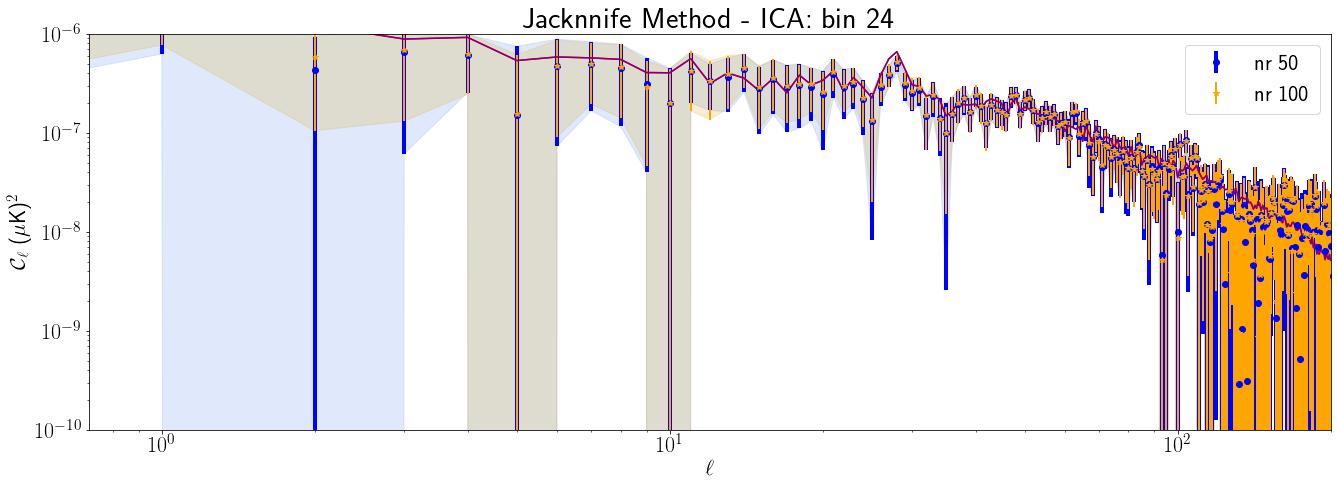

In [4]:
bin_ = np.random.randint(Cls_binned1.size)

fig = plt.figure()
grid = plt.GridSpec(1,1,top=1.5,right=3)

l = np.arange(Cls_binned1[0][0].size)
fact = 1#l*(l+1)/(2*np.pi)

ax = plt.subplot(grid[0,0])
plt.title("Jacknnife Method - ICA: bin {}".format(bin_), fontsize=30)

plt.plot(    l, fact*Cls2['pure'][realisation][bin_,:], color="red")#50
plt.errorbar(l, fact*Cls_ndb2[realisation][bin_,:], yerr=std_jack2[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=4, label="nr 50")
plt.fill_between(l, fact*Cls_ndb2[realisation][bin_,:] - std_jack2[str(bin_)], fact*Cls_ndb2[realisation][bin_,:] + std_jack2[str(bin_)], color='cornflowerblue', alpha=0.2)

plt.plot(    l, fact*Cls1['pure'][realisation][bin_,:], color="purple")#100
plt.errorbar(l, fact*Cls_ndb1[realisation][bin_,:], yerr=std_jack1[str(bin_)], fmt='*', color="orange",ecolor='orange', elinewidth=2, label="nr 100")
plt.fill_between(l, fact*Cls_ndb1[realisation][bin_,:] - std_jack1[str(bin_)], fact*Cls_ndb1[realisation][bin_,:] + std_jack1[str(bin_)], color='goldenrod', alpha=0.2)


plt.xscale("log")
plt.yscale("log")
#plt.xlabel(r"$\ell$")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
plt.ylim(1e-10,1e-6)
plt.xlim(0,200)
plt.legend();

In [5]:
Cls3        = cs.loadcls(pathcls3,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
Cls_ndb3    = statc.output_debias(Cls=Cls3, model=model, output="Cls_debias",dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise)
Cls_binned3 = statc.data_binned(Cls_ndb3) #building cls per bins, with different realisations
std_jack3   = statc.jacknnife_stat(Cls_binned3, stat_func=np.std)

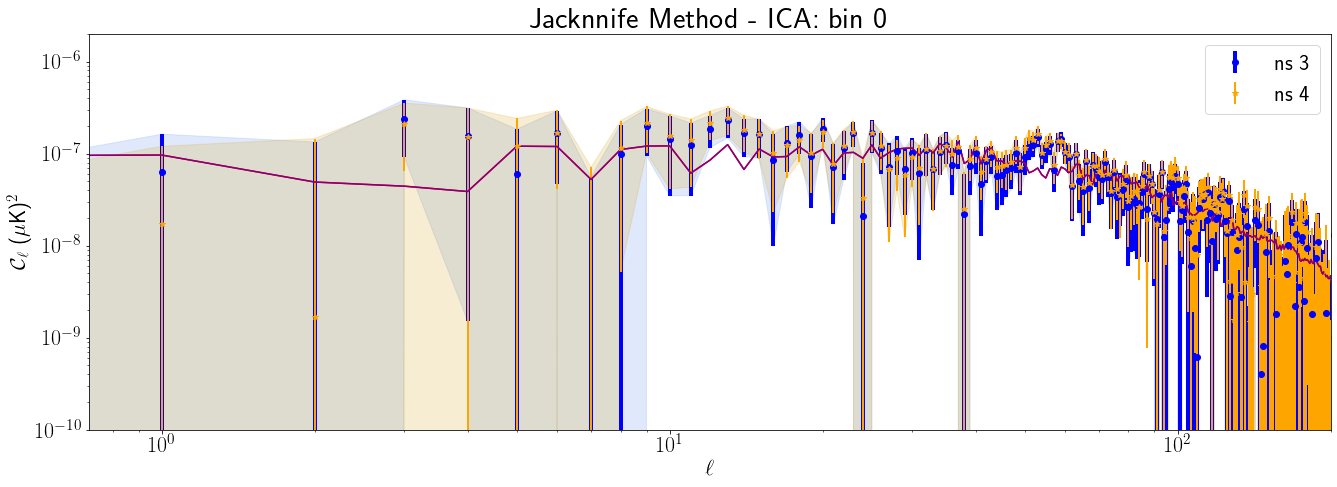

In [6]:
bin_ = np.random.randint(Cls_binned3.size)

fig = plt.figure()
grid = plt.GridSpec(1,1,top=1.5,right=3)

l = np.arange(Cls_binned1[0][0].size)
fact = 1#l*(l+1)/(2*np.pi)

ax = plt.subplot(grid[0,0])
plt.title("Jacknnife Method - ICA: bin {}".format(bin_), fontsize=30)

plt.plot(    l, fact*Cls3['pure'][realisation][bin_,:], color="red")#50
plt.errorbar(l, fact*Cls_ndb3[realisation][bin_,:], yerr=std_jack3[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=4, label="ns 3")
plt.fill_between(l, fact*Cls_ndb3[realisation][bin_,:] - std_jack3[str(bin_)], fact*Cls_ndb3[realisation][bin_,:] + std_jack3[str(bin_)], color='cornflowerblue', alpha=0.2)

plt.plot(    l, fact*Cls1['pure'][realisation][bin_,:], color="purple")#100
plt.errorbar(l, fact*Cls_ndb1[realisation][bin_,:], yerr=std_jack1[str(bin_)], fmt='*', color="orange",ecolor='orange', elinewidth=2, label="ns 4")
plt.fill_between(l, fact*Cls_ndb1[realisation][bin_,:] - std_jack1[str(bin_)], fact*Cls_ndb1[realisation][bin_,:] + std_jack1[str(bin_)], color='goldenrod', alpha=0.2)


plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
plt.ylim(1e-10,2e-6)
plt.xlim(0,200)
plt.legend();

In [7]:
pathcls4    = "/home/amarins/ComponentSeparation/gmca/outputs/GMCAn3nr50" 
Cls4        = cs.loadcls(pathcls4,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
Cls_ndb4    = statc.output_debias(Cls=Cls4, model=model, output="Cls_debias",dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise)
Cls_binned4 = statc.data_binned(Cls_ndb4) #building cls per bins, with different realisations
std_jack4   = statc.jacknnife_stat(Cls_binned4, stat_func=np.std)

In [8]:
std_jack4.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'])

In [9]:
np.intersect1d(list(Cls4["21cm"].keys()),list(Cls2["21cm"].keys()))

array(['L11', 'L13', 'L17', 'L18', 'L22', 'L24', 'L27', 'L28', 'L30',
       'L31', 'L33', 'L34', 'L44', 'L5', 'L56', 'L64', 'L66', 'L68',
       'L70', 'L8', 'L81', 'L89', 'L97'], dtype='<U4')

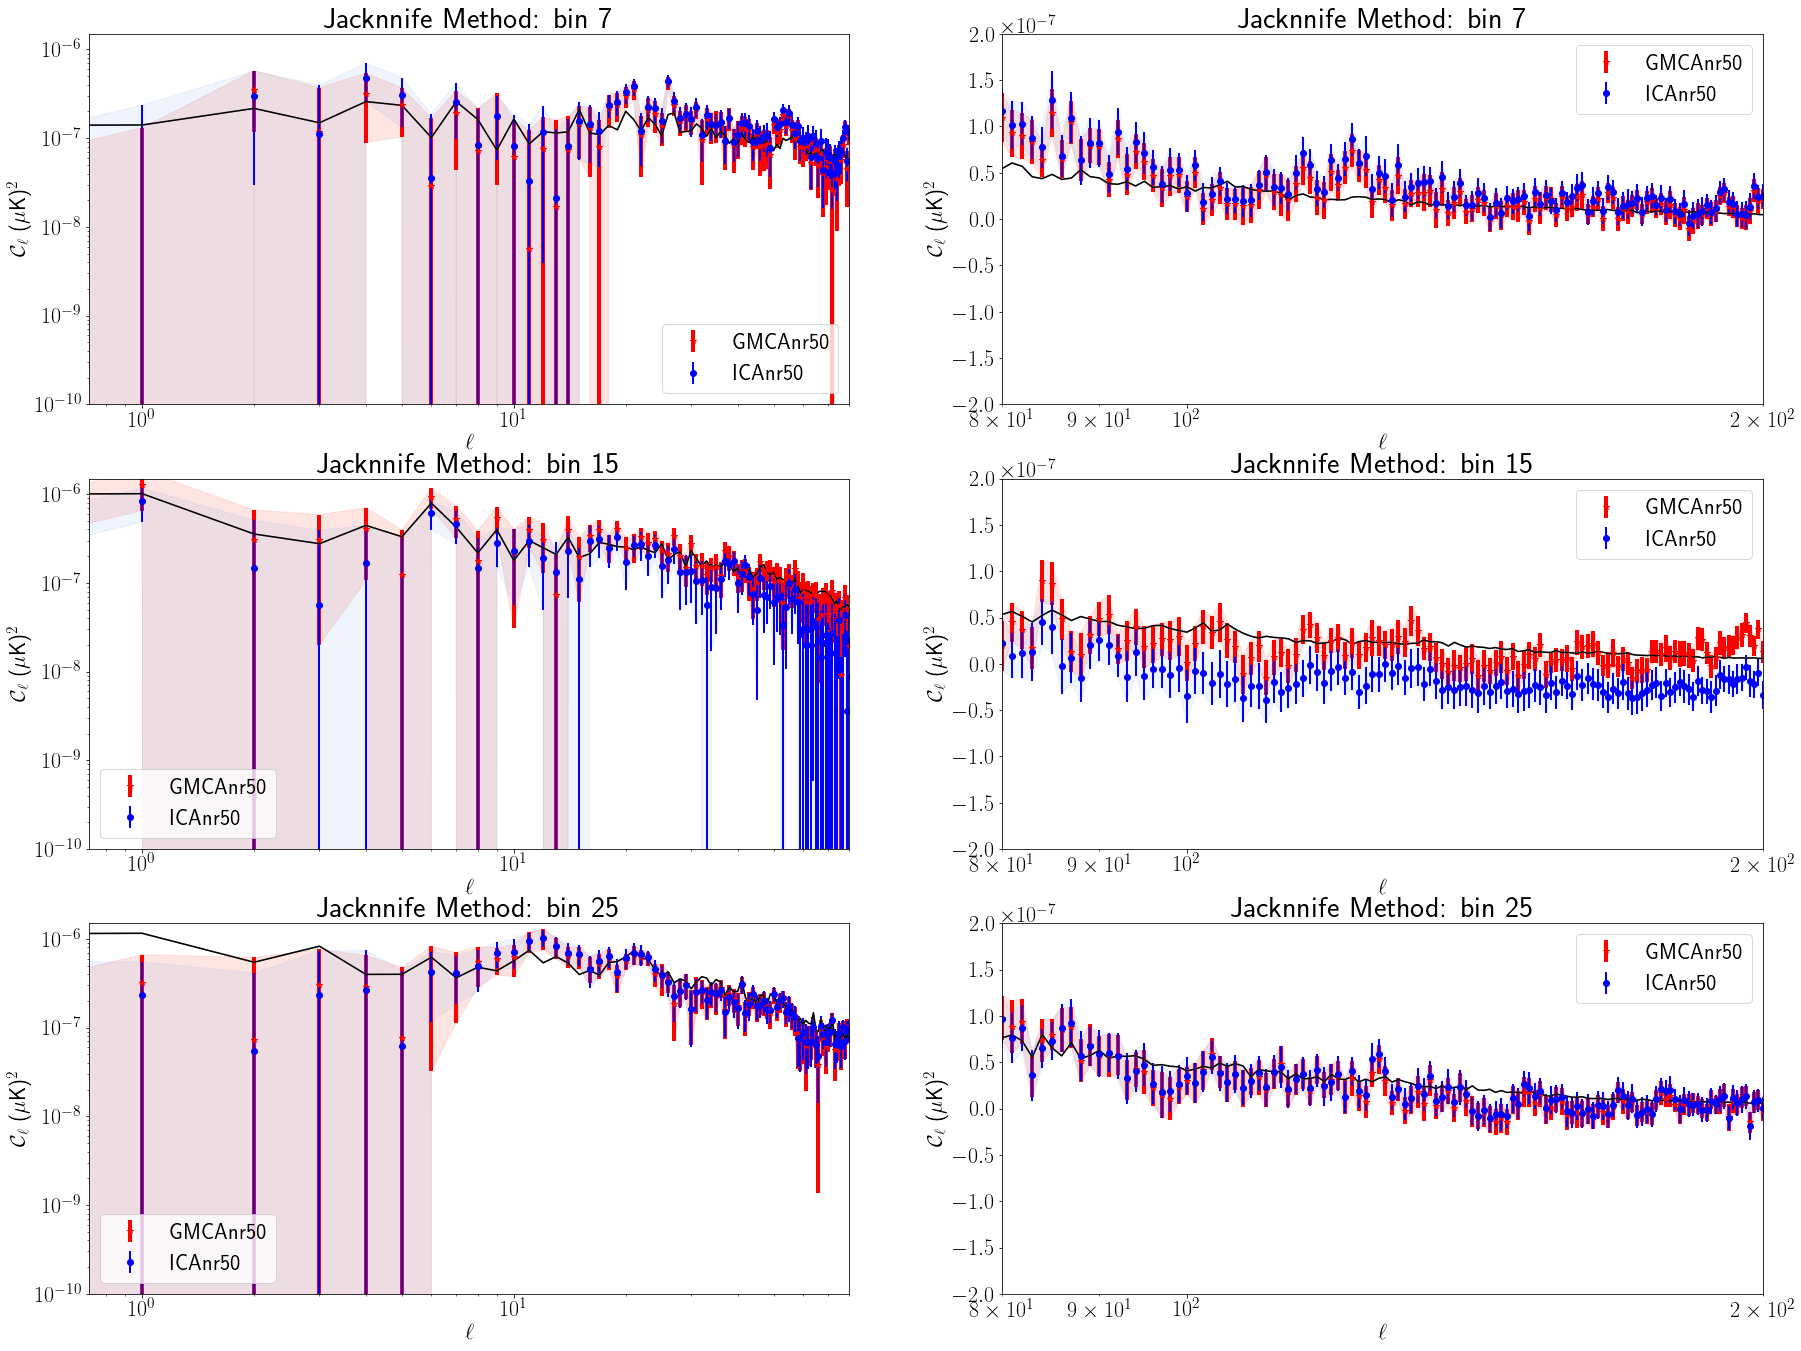

In [10]:
realisation= "L30"

l = np.arange(Cls_binned1[0][0].size)
fact = 1#l*(l+1)/(2*np.pi)

bin1 = np.random.choice(np.arange(0,10,1),size=1)
bin2 = np.random.choice(np.arange(10,20,1),size=1)
bin3 = np.random.choice(np.arange(20,30,1),size=1)

bins = np.array([bin1,bin2,bin3])

fig = plt.figure()
grid = plt.GridSpec(bins.size,2,top=1.5*bins.size,right=4)


for i,bin_ in enumerate(bins):
    bin_=bin_[0]
    ax = plt.subplot(grid[i,0])
    plt.title("Jacknnife Method: bin {}".format(bin_), fontsize=30)

    plt.plot(    l, fact*Cls4['pure'][realisation][bin_,:], color="darkgray")#100
    plt.errorbar(l, fact*Cls_ndb4[realisation][bin_,:], yerr=std_jack4[str(bin_)], fmt='*', color="red",ecolor='red', elinewidth=4, label="GMCAnr50")
    plt.fill_between(l, fact*Cls_ndb4[realisation][bin_,:] - std_jack4[str(bin_)], fact*Cls_ndb4[realisation][bin_,:] + std_jack4[str(bin_)], color='salmon', alpha=0.2)

    plt.plot(    l, fact*Cls2['pure'][realisation][bin_,:], color="black")#50
    plt.errorbar(l, fact*Cls_ndb2[realisation][bin_,:], yerr=std_jack2[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=2, label="ICAnr50")
    plt.fill_between(l, fact*Cls_ndb2[realisation][bin_,:] - std_jack2[str(bin_)], fact*Cls_ndb2[realisation][bin_,:] + std_jack2[str(bin_)], color='cornflowerblue', alpha=0.1)


    plt.xscale("log")
    plt.yscale("log")
    #plt.xlabel(r"$\ell$")
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
    plt.ylim(1e-10,1.5e-6)
    plt.xlim(0,80)
    plt.legend();



    ####

    ax = plt.subplot(grid[i,1])
    plt.title("Jacknnife Method: bin {}".format(bin_), fontsize=30)

    plt.plot(    l, fact*Cls4['pure'][realisation][bin_,:], color="darkgray")#100
    plt.errorbar(l, fact*Cls_ndb4[realisation][bin_,:], yerr=std_jack4[str(bin_)], fmt='*', color="red",ecolor='red', elinewidth=4, label="GMCAnr50")
    plt.fill_between(l, fact*Cls_ndb4[realisation][bin_,:] - std_jack4[str(bin_)], fact*Cls_ndb4[realisation][bin_,:] + std_jack4[str(bin_)], color='salmon', alpha=0.2)

    plt.plot(    l, fact*Cls2['pure'][realisation][bin_,:], color="black")#100
    plt.errorbar(l, fact*Cls_ndb2[realisation][bin_,:], yerr=std_jack2[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=2, label="ICAnr50")
    plt.fill_between(l, fact*Cls_ndb2[realisation][bin_,:] - std_jack2[str(bin_)], fact*Cls_ndb2[realisation][bin_,:] + std_jack2[str(bin_)], color='cornflowerblue', alpha=0.1)



    plt.xscale("log")
    #plt.yscale("log")
    #plt.xlabel(r"$\ell$")
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
    #plt.ylim(1e-14,2e-7)
    plt.ylim(-2e-7,2e-7)
    plt.xlim(80,200)
    plt.legend();


In [11]:
pathcls5    = "/home/amarins/ComponentSeparation/gmca/outputs/GMCAn3nr100" 
Cls5        = cs.loadcls(pathcls5,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
Cls_ndb5    = statc.output_debias(Cls=Cls5, model=model, output="Cls_debias",dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise)
Cls_binned5 = statc.data_binned(Cls_ndb5) #building cls per bins, with different realisations
std_jack5   = statc.jacknnife_stat(Cls_binned5, stat_func=np.std)

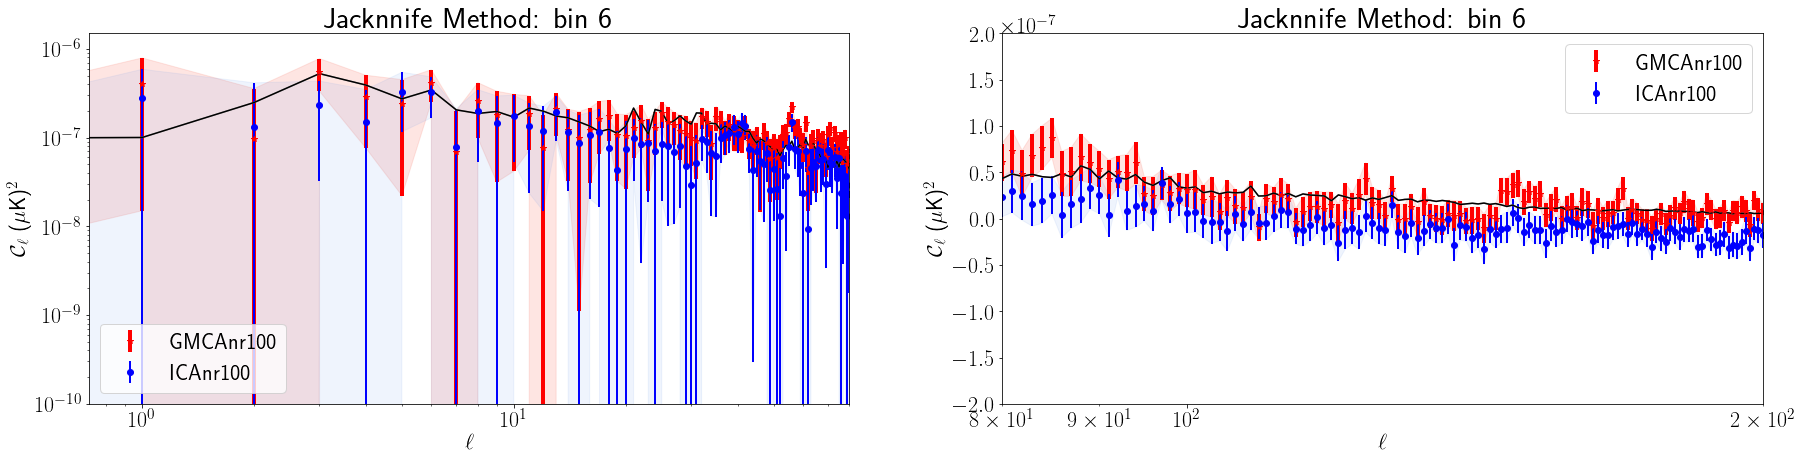

In [12]:
realisation= "L47"

l = np.arange(Cls_binned1[0][0].size)
fact = 1#l*(l+1)/(2*np.pi)

bin1 = np.random.choice(np.arange(0,10,1),size=1)
bin2 = np.random.choice(np.arange(10,20,1),size=1)
bin3 = np.random.choice(np.arange(20,30,1),size=1)

bins = np.array([bin1,bin2,bin3])

fig = plt.figure()
grid = plt.GridSpec(bins.size,2,top=1.5*bins.size,right=4)


for i,bin_ in enumerate([[6]]):
    bin_=bin_[0]
    ax = plt.subplot(grid[i,0])
    plt.title("Jacknnife Method: bin {}".format(bin_), fontsize=30)

    plt.plot(    l, fact*Cls5['pure'][realisation][bin_,:], color="darkgray")#100
    plt.errorbar(l, fact*Cls_ndb5[realisation][bin_,:], yerr=std_jack5[str(bin_)], fmt='*', color="red",ecolor='red', elinewidth=4, label="GMCAnr100")
    plt.fill_between(l, fact*Cls_ndb5[realisation][bin_,:] - std_jack5[str(bin_)], fact*Cls_ndb5[realisation][bin_,:] + std_jack5[str(bin_)], color='salmon', alpha=0.2)

    plt.plot(    l, fact*Cls1['pure'][realisation][bin_,:], color="black")#50
    plt.errorbar(l, fact*Cls_ndb1[realisation][bin_,:], yerr=std_jack1[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=2, label="ICAnr100")
    plt.fill_between(l, fact*Cls_ndb1[realisation][bin_,:] - std_jack1[str(bin_)], fact*Cls_ndb1[realisation][bin_,:] + std_jack1[str(bin_)], color='cornflowerblue', alpha=0.1)


    plt.xscale("log")
    plt.yscale("log")
    #plt.xlabel(r"$\ell$")
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
    plt.ylim(1e-10,1.5e-6)
    plt.xlim(0,80)
    plt.legend();



    ####

    ax = plt.subplot(grid[i,1])
    plt.title("Jacknnife Method: bin {}".format(bin_), fontsize=30)

    plt.plot(    l, fact*Cls5['pure'][realisation][bin_,:], color="darkgray")#100
    plt.errorbar(l, fact*Cls_ndb5[realisation][bin_,:], yerr=std_jack5[str(bin_)], fmt='*', color="red",ecolor='red', elinewidth=4, label="GMCAnr100")
    plt.fill_between(l, fact*Cls_ndb5[realisation][bin_,:] - std_jack5[str(bin_)], fact*Cls_ndb5[realisation][bin_,:] + std_jack5[str(bin_)], color='salmon', alpha=0.2)

    plt.plot(    l, fact*Cls1['pure'][realisation][bin_,:], color="black")#100
    plt.errorbar(l, fact*Cls_ndb1[realisation][bin_,:], yerr=std_jack1[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=2, label="ICAnr100")
    plt.fill_between(l, fact*Cls_ndb1[realisation][bin_,:] - std_jack1[str(bin_)], fact*Cls_ndb1[realisation][bin_,:] + std_jack1[str(bin_)], color='cornflowerblue', alpha=0.1)



    plt.xscale("log")
    #plt.yscale("log")
    #plt.xlabel(r"$\ell$")
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
    #plt.ylim(1e-14,2e-7)
    plt.ylim(-2e-7,2e-7)
    plt.xlim(80,200)
    plt.legend();

In [13]:
pathcls6    = "/home/amarins/ComponentSeparation/gmca/outputs/GMCAn4nr100" 
Cls6        = cs.loadcls(pathcls6,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
Cls_ndb6    = statc.output_debias(Cls=Cls6, model=model, output="Cls_debias",dir_hi = dir_hi, dir_prior=dir_prior, dir_noise = dir_noise)
Cls_binned6 = statc.data_binned(Cls_ndb6) #building cls per bins, with different realisations
std_jack6   = statc.jacknnife_stat(Cls_binned6, stat_func=np.std)

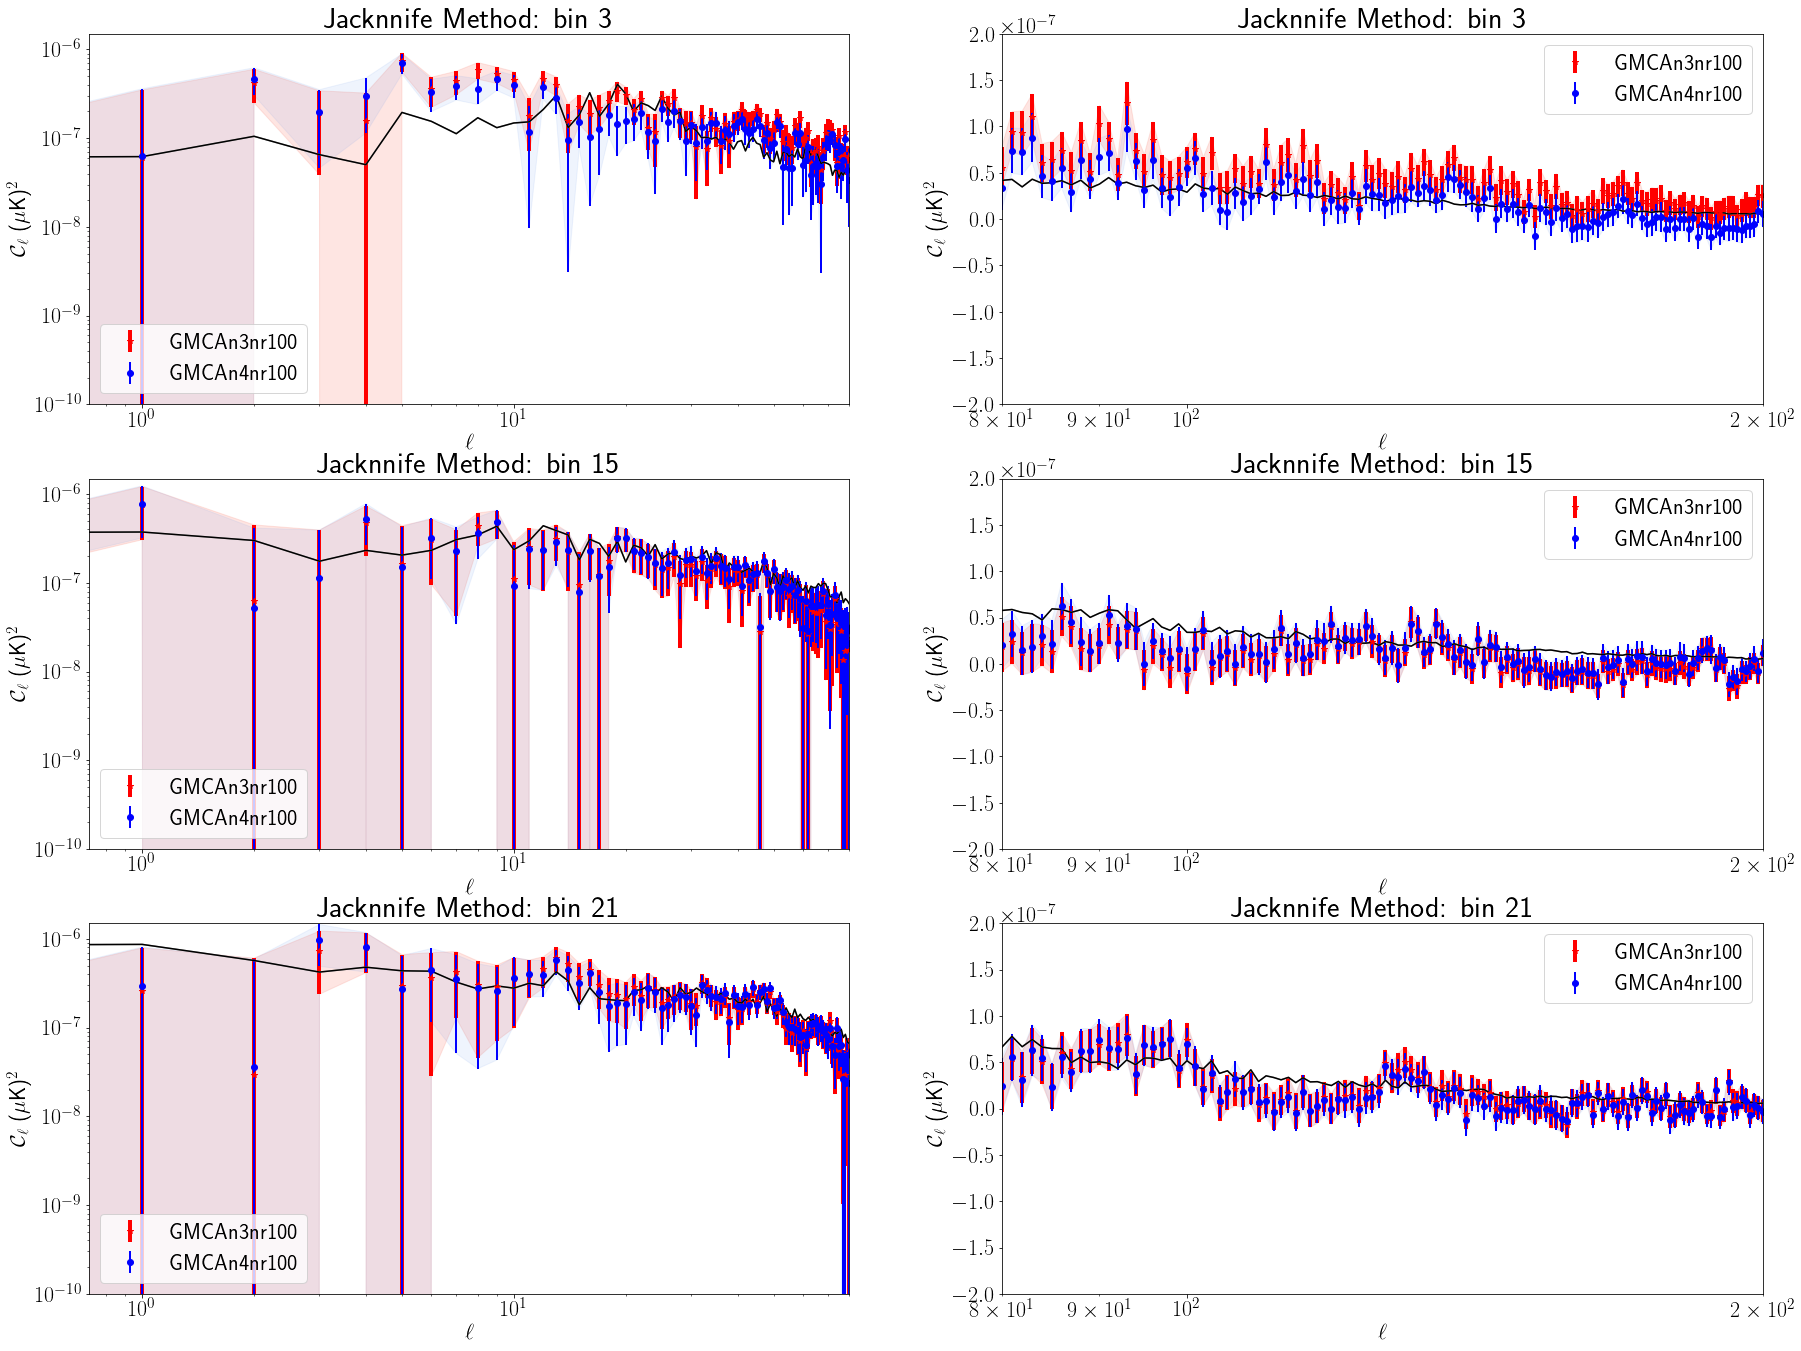

In [14]:
realisation= "L47"

l = np.arange(Cls_binned1[0][0].size)
fact = 1#l*(l+1)/(2*np.pi)

bin1 = np.random.choice(np.arange(0,10,1),size=1)
bin2 = np.random.choice(np.arange(10,20,1),size=1)
bin3 = np.random.choice(np.arange(20,30,1),size=1)

bins = np.array([bin1,bin2,bin3])

fig = plt.figure()
grid = plt.GridSpec(bins.size,2,top=1.5*bins.size,right=4)


for i,bin_ in enumerate(bins):
    bin_=bin_[0]
    ax = plt.subplot(grid[i,0])
    plt.title("Jacknnife Method: bin {}".format(bin_), fontsize=30)

    plt.plot(    l, fact*Cls5['pure'][realisation][bin_,:], color="darkgray")#n3
    plt.errorbar(l, fact*Cls_ndb5[realisation][bin_,:], yerr=std_jack5[str(bin_)], fmt='*', color="red",ecolor='red', elinewidth=4, label="GMCAn3nr100")
    plt.fill_between(l, fact*Cls_ndb5[realisation][bin_,:] - std_jack5[str(bin_)], fact*Cls_ndb5[realisation][bin_,:] + std_jack5[str(bin_)], color='salmon', alpha=0.2)

    plt.plot(    l, fact*Cls6['pure'][realisation][bin_,:], color="black")#n4
    plt.errorbar(l, fact*Cls_ndb6[realisation][bin_,:], yerr=std_jack6[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=2, label="GMCAn4nr100")
    plt.fill_between(l, fact*Cls_ndb6[realisation][bin_,:] - std_jack6[str(bin_)], fact*Cls_ndb6[realisation][bin_,:] + std_jack6[str(bin_)], color='cornflowerblue', alpha=0.1)


    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\ell$")
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
    plt.ylim(1e-10,1.5e-6)
    plt.xlim(0,80)
    plt.legend();

    ####

    ax = plt.subplot(grid[i,1])
    plt.title("Jacknnife Method: bin {}".format(bin_), fontsize=30)

    plt.plot(    l, fact*Cls5['pure'][realisation][bin_,:], color="darkgray")#100
    plt.errorbar(l, fact*Cls_ndb5[realisation][bin_,:], yerr=std_jack5[str(bin_)], fmt='*', color="red",ecolor='red', elinewidth=4, label="GMCAn3nr100")
    plt.fill_between(l, fact*Cls_ndb5[realisation][bin_,:] - std_jack5[str(bin_)], fact*Cls_ndb5[realisation][bin_,:] + std_jack5[str(bin_)], color='salmon', alpha=0.2)

    plt.plot(    l, fact*Cls6['pure'][realisation][bin_,:], color="black")#100
    plt.errorbar(l, fact*Cls_ndb6[realisation][bin_,:], yerr=std_jack6[str(bin_)], fmt='o', color="blue",ecolor='blue', elinewidth=2, label="GMCAn4nr100")
    plt.fill_between(l, fact*Cls_ndb6[realisation][bin_,:] - std_jack6[str(bin_)], fact*Cls_ndb6[realisation][bin_,:] + std_jack6[str(bin_)], color='cornflowerblue', alpha=0.1)

    plt.xscale("log")
    #plt.yscale("log")
    #plt.xlabel(r"$\ell$")
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$\mathcal{C}_{\ell}$ ($\mu$K)$^2$")
    #plt.ylim(1e-14,2e-7)
    plt.ylim(-2e-7,2e-7)
    plt.xlim(80,200)
    plt.legend();

In [15]:
std_jack1.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'])

In [16]:
std1 = np.zeros((30,768))
for i,iname in enumerate(std_jack1.keys()):
    std1[i] = std_jack1[iname]

std2 = np.zeros((30,768))
for i,iname in enumerate(std_jack2.keys()):
    std2[i] = std_jack2[iname]

std3 = np.zeros((30,768))
for i,iname in enumerate(std_jack3.keys()):
    std3[i] = std_jack3[iname]

std4 = np.zeros((30,768))
for i,iname in enumerate(std_jack4.keys()):
    std4[i] = std_jack4[iname]


std5 = np.zeros((30,768))
for i,iname in enumerate(std_jack5.keys()):
    std5[i] = std_jack5[iname]

std6 = np.zeros((30,768))
for i,iname in enumerate(std_jack6.keys()):
    std6[i] = std_jack6[iname]
    

std_all = pd.Series({"ICAn4nr100":std1, "ICAn4nr50":std2, "ICAn3nr100":std3, "GMCAn3nr50":std4, "GMCAn3nr100":std5, "GMCAn4nr100":std6})

In [17]:
L = "L5"

xi_binned = (Cls_ndb1[L] - Cls1['pure'][L])/std1
xi_binned1 = np.square(xi_binned)

xi_binned = (Cls_ndb2[L] - Cls2['pure'][L])/std2
xi_binned2 = np.square(xi_binned)

xi_binned = (Cls_ndb3[L] - Cls3['pure'][L])/std3
xi_binned3 = np.square(xi_binned)

xi_binned = (Cls_ndb4[L] - Cls4['pure'][L])/std4
xi_binned4 = np.square(xi_binned)

xi_binned = (Cls_ndb5[L] - Cls5['pure'][L])/std5
xi_binned5 = np.square(xi_binned)

xi_binned = (Cls_ndb6[L] - Cls6['pure'][L])/std6
xi_binned6 = np.square(xi_binned)

xi_all = pd.Series({"ICAn4nr100":xi_binned1, "ICAn4nr50":xi_binned2, "ICAn3nr100":xi_binned3, "GMCAn3nr50":xi_binned4, "GMCAn3nr100":xi_binned5, "GMCAn4nr100":xi_binned6})

In [18]:
print(xi_all.keys())

Index(['ICAn4nr100', 'ICAn4nr50', 'ICAn3nr100', 'GMCAn3nr50', 'GMCAn3nr100',
       'GMCAn4nr100'],
      dtype='object')


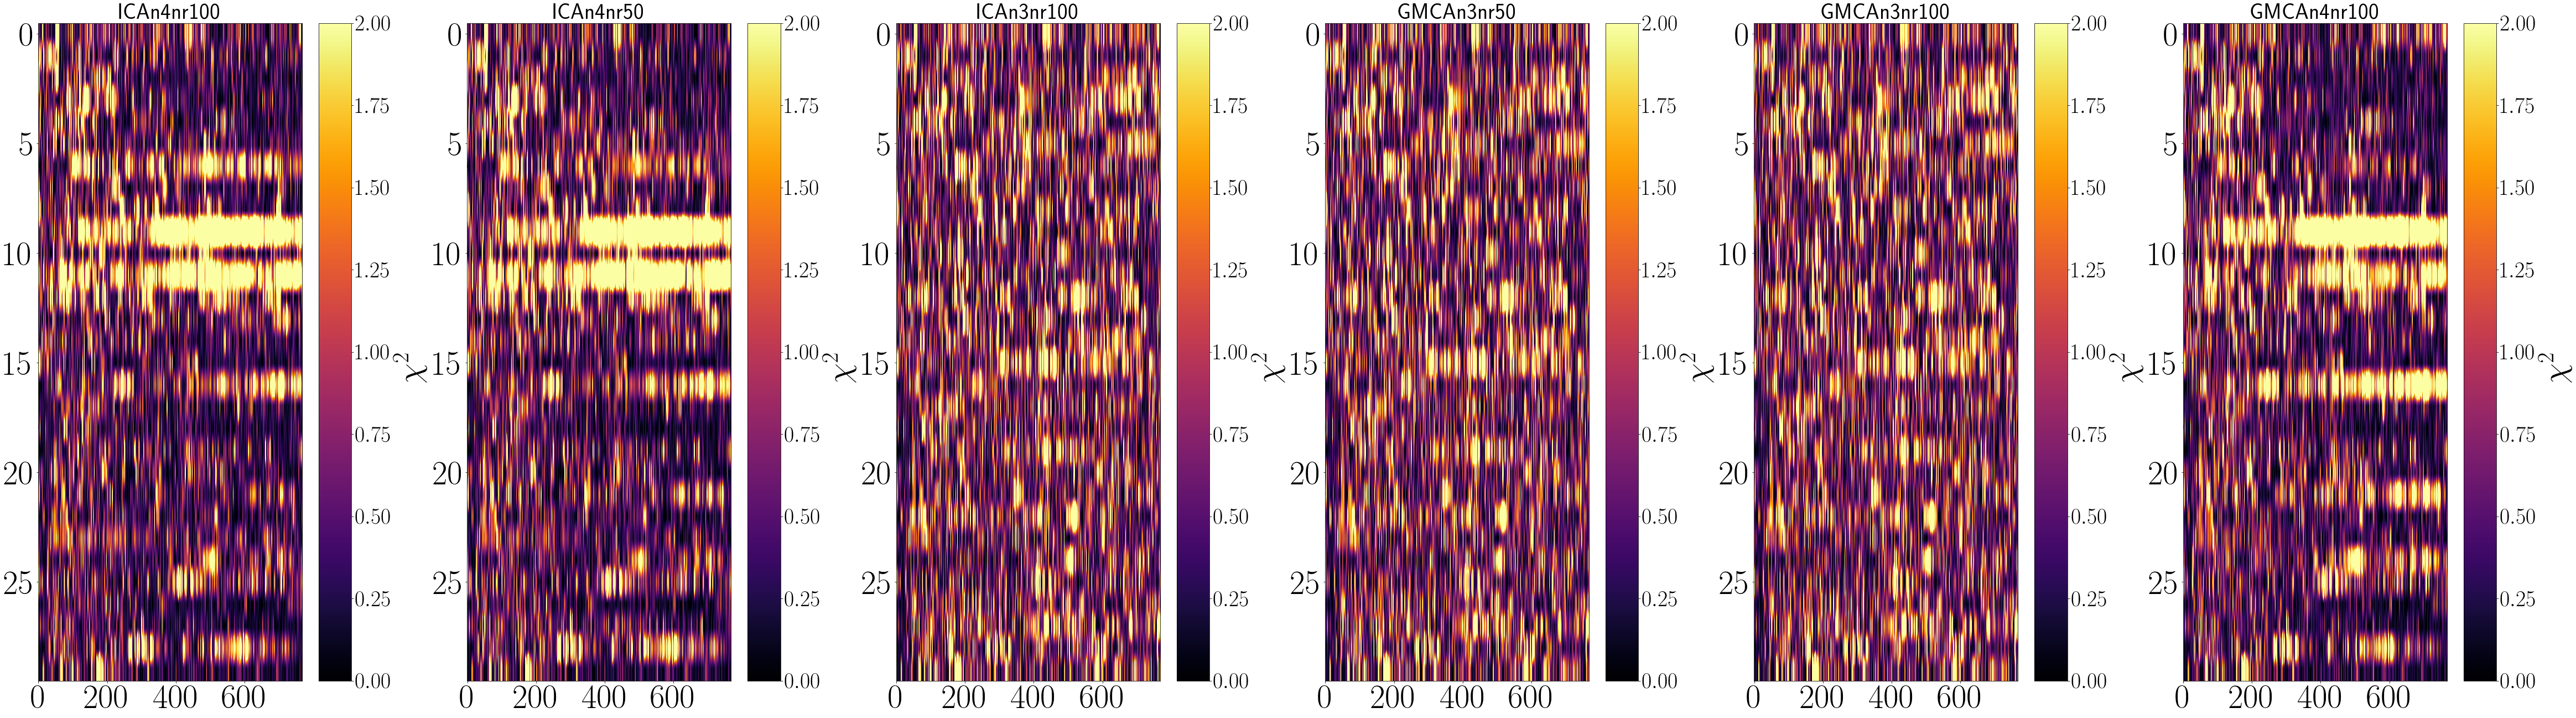

In [19]:
plt.figure(figsize=(7,12))
grid = plt.GridSpec(1,xi_all.size,right=1.5*xi_all.size, top=1.5, wspace=0.3)

for i,iname in enumerate(xi_all.keys()):
    ax = plt.subplot(grid[0,i])
    plt.imshow(xi_all[iname], aspect="auto", cmap="inferno", vmin=0, vmax=2)
    plt.xticks(fontsize=60)
    plt.yticks(fontsize=60)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=40)
    cbar.set_label(r"$\chi^2$",horizontalalignment='right',fontsize=60)
    plt.title(iname, fontsize=40)
    

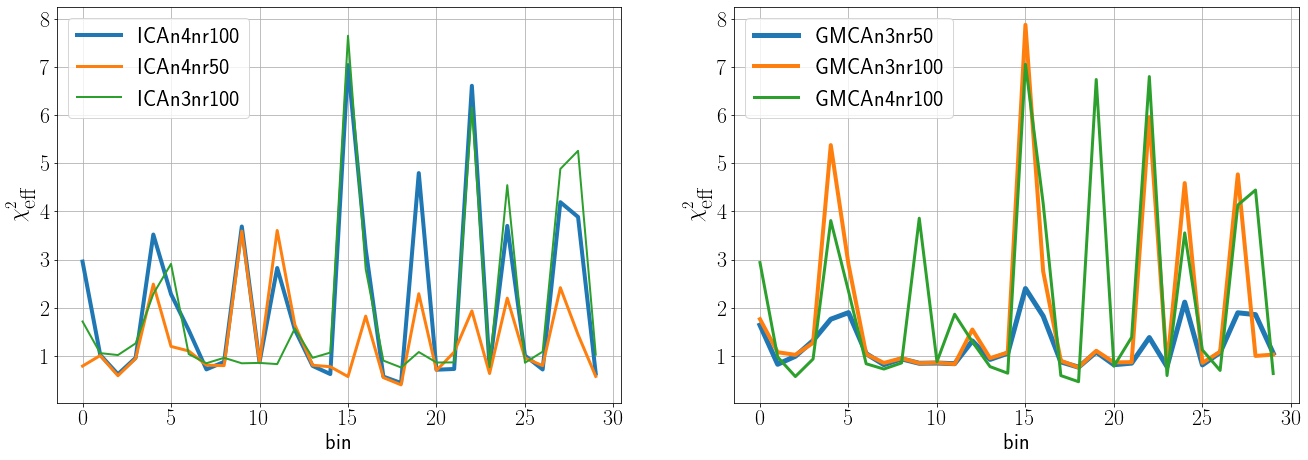

In [20]:
plt.figure()
grid = plt.GridSpec(1,2,top=1.5,right=3)
for i, iname in enumerate(xi_all.keys()):
    if i<3:
        ax = plt.subplot(grid[0,0])
        plt.plot(np.sum(xi_all[iname],axis=1)/768. , label=iname, linestyle="solid", linewidth=1*(xi_all.size - i-2))
        plt.xlabel("bin")
        plt.ylabel(r"$\chi^2_{\textrm{eff}}$")
        plt.legend()
        plt.grid(True)
    else:
        ax1 = plt.subplot(grid[0,1], sharey=ax,sharex=ax)
        plt.plot(np.sum(xi_all[iname],axis=1)/768. , label=iname, linestyle="solid", linewidth=1*(xi_all.size - i+2))
        plt.xlabel("bin")
        plt.ylabel(r"$\chi^2_{\textrm{eff}}$")        
        plt.legend()
        plt.grid(True)        


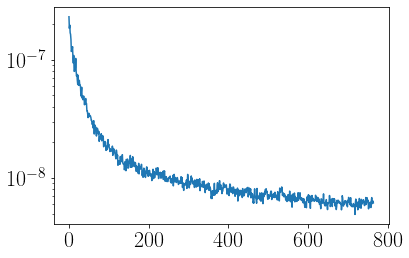

In [21]:
plt.semilogy(std_all['GMCAn3nr100'][10][3:])